<a href="https://colab.research.google.com/github/wolfram3002/Atomic_Heart/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


from matplotlib import pyplot as plt
df['AGE_50'].plot(kind='hist', bins=20, title='AGE_50')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['MD_50'].plot(kind='hist', bins=20, title='MD_50')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['SBP_50'].plot(kind='hist', bins=20, title='SBP_50')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['DBP_50'].plot(kind='hist', bins=20, title='DBP_50')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='AGE_50', y='MD_50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='MD_50', y='SBP_50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SBP_50', y='DBP_50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DBP_50', y='HT_50', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['AGE_50'].plot(kind='line', figsize=(8, 4), title='AGE_50')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['MD_50'].plot(kind='line', figsize=(8, 4), title='MD_50')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['SBP_50'].plot(kind='line', figsize=(8, 4), title='SBP_50')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['DBP_50'].plot(kind='line', figsize=(8, 4), title='DBP_50')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'WT_50'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        5
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.WT_50 = df_median.WT_50.fillna(df_median.WT_50.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.WT_50 = df_mean.WT_50.fillna(df_median.WT_50.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

In [ ]:
df['is_big_weight'] = np.where(df['WT_50'] >= 245, 1, 0).astype(int)

In [ ]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH', 'is_big_weight'],
      dtype='object')

In [ ]:
Y = df['is_big_weight'] # выбираем целевую переменную (категориальную)
X = df.drop('is_big_weight', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('WT_50', axis=1)

5. **Графический анализ**

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,157,0,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


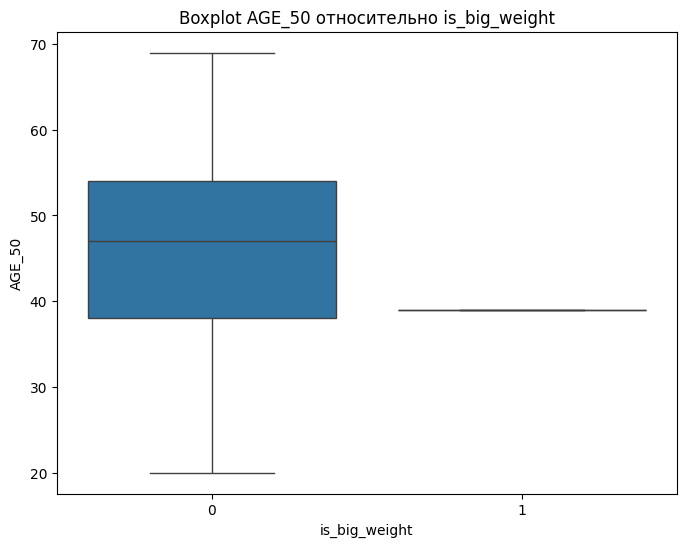

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


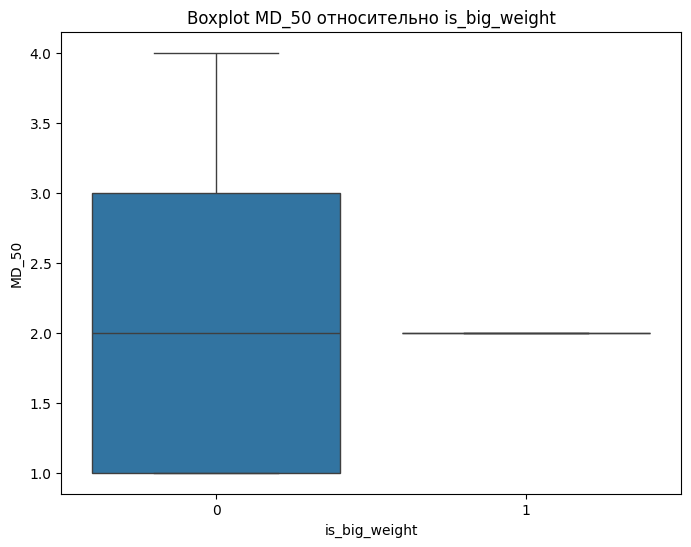

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


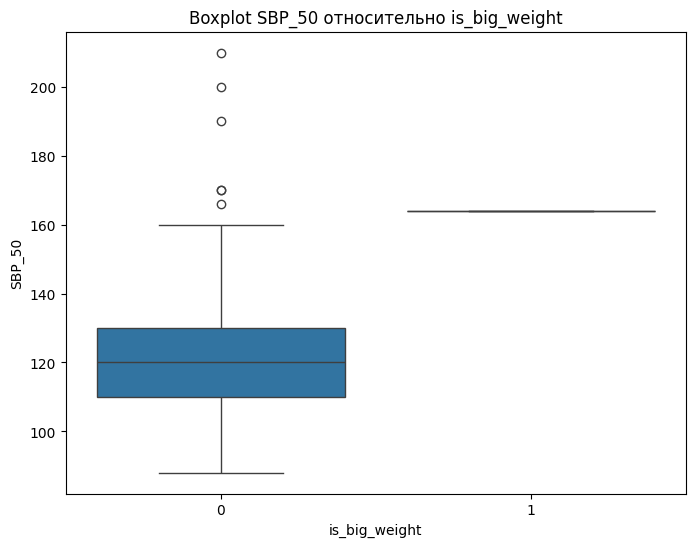

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


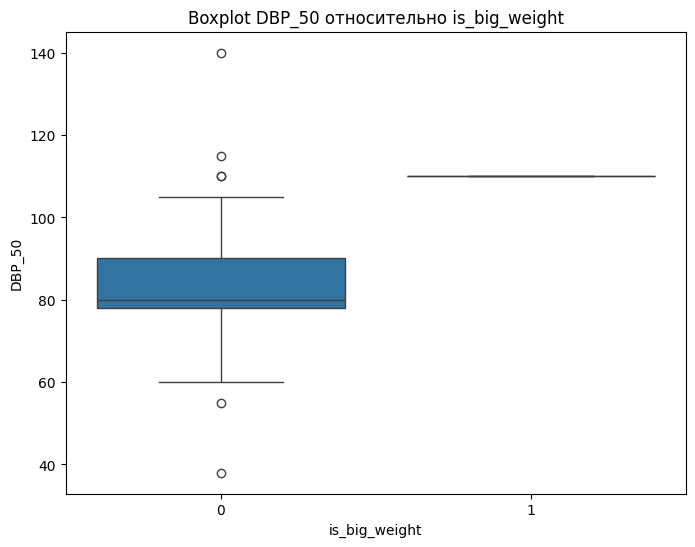

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


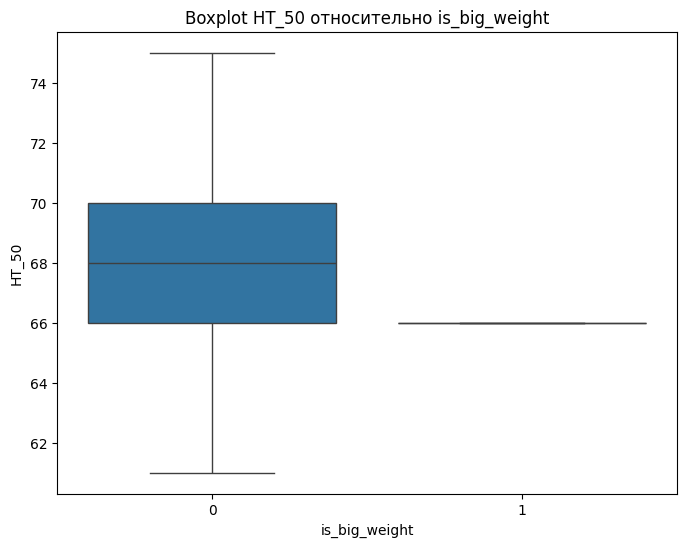

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


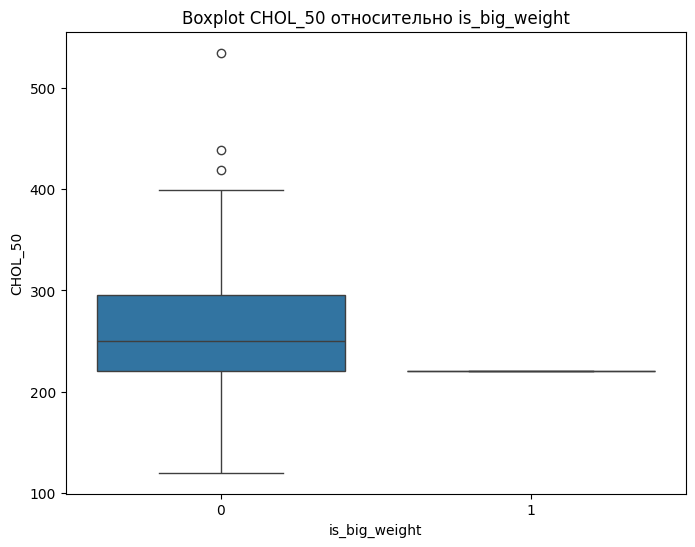

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


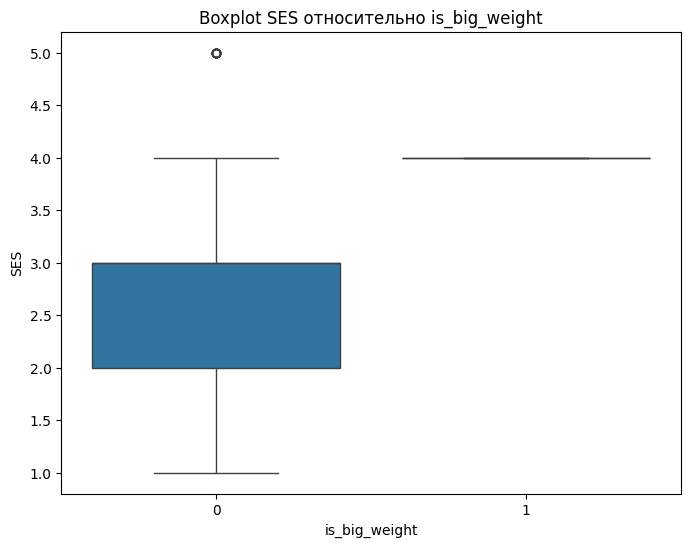

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


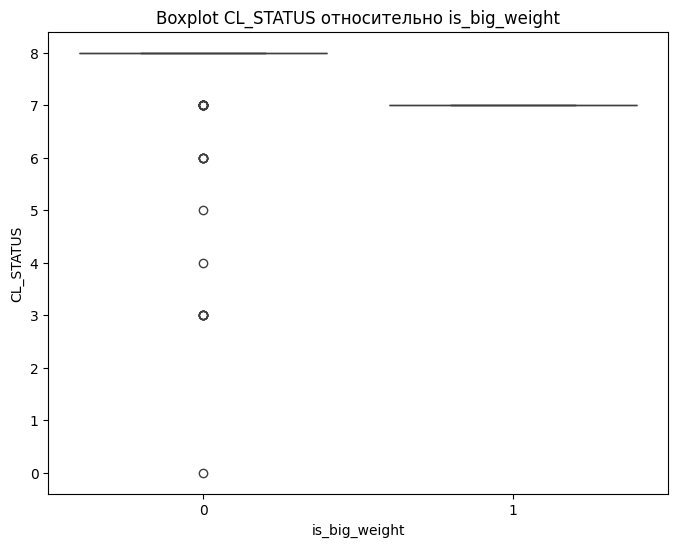

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


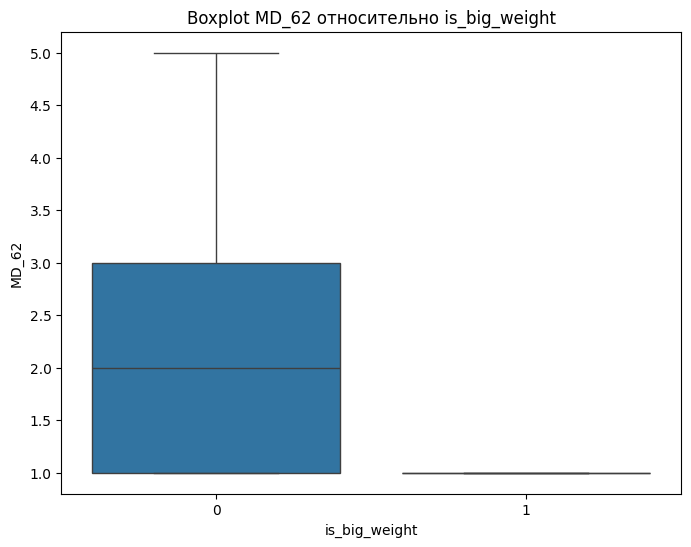

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


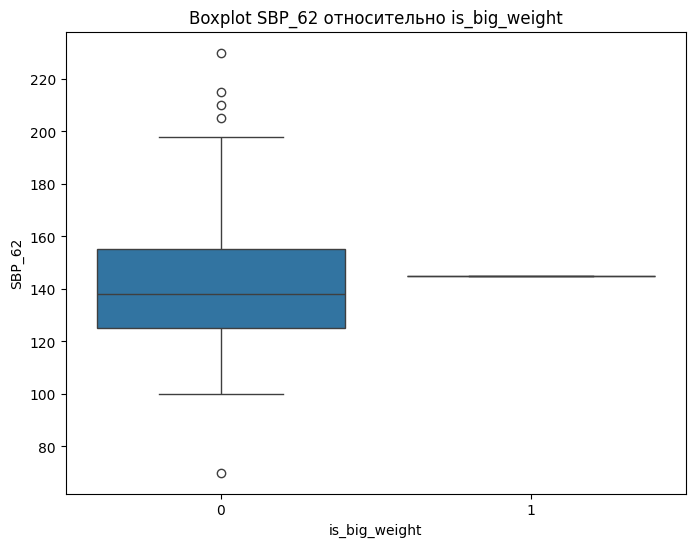

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


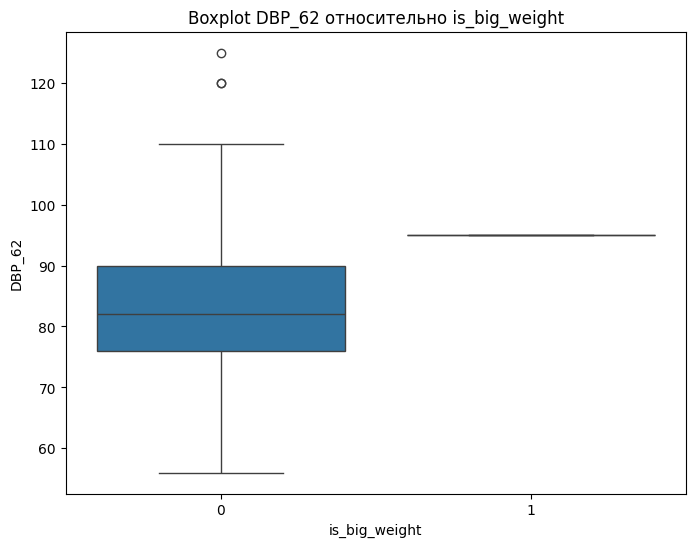

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


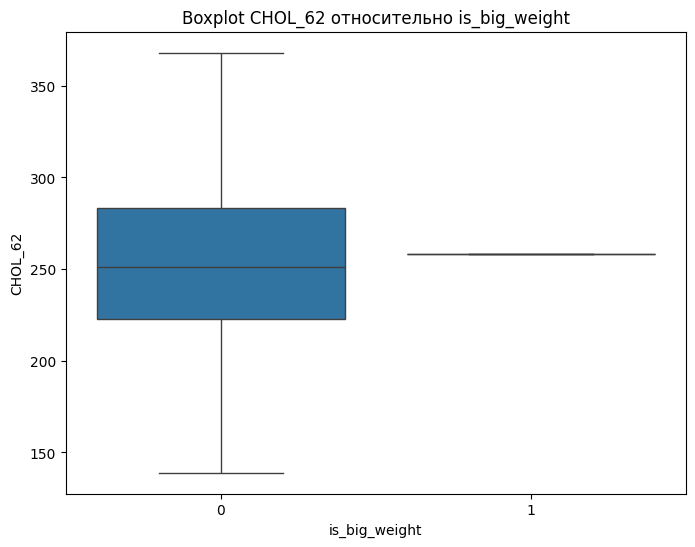

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


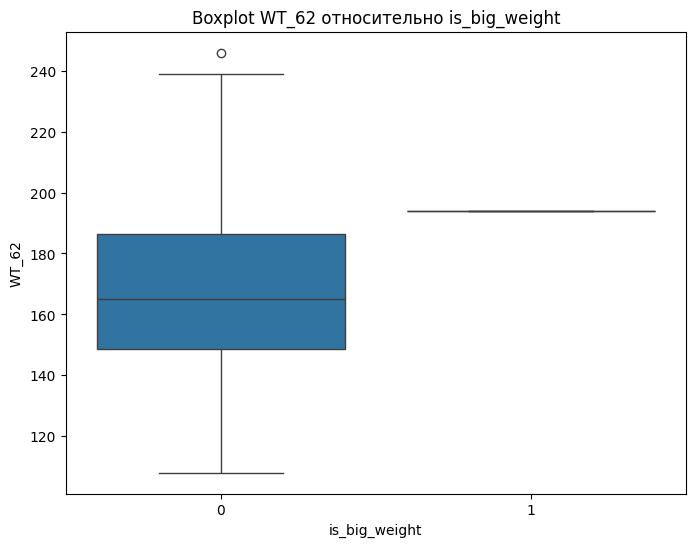

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


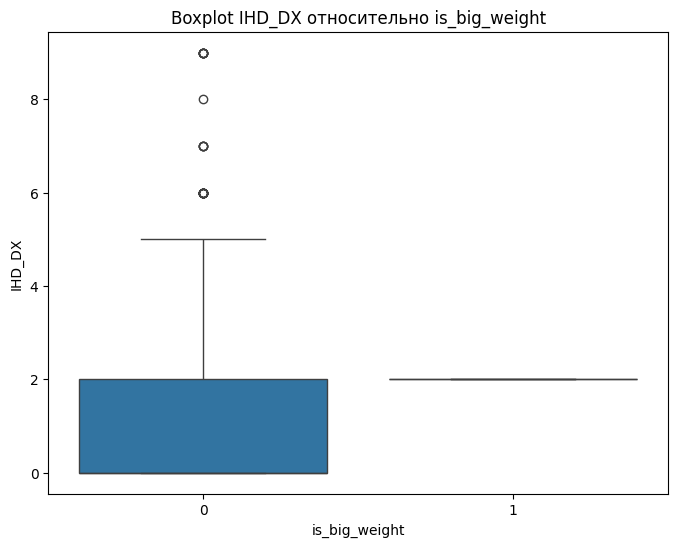

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


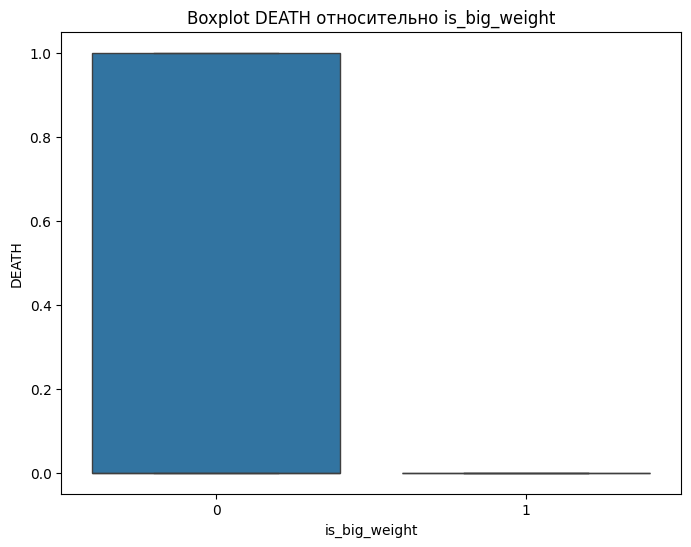

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_big_weight', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_big_weight')
    plt.show()

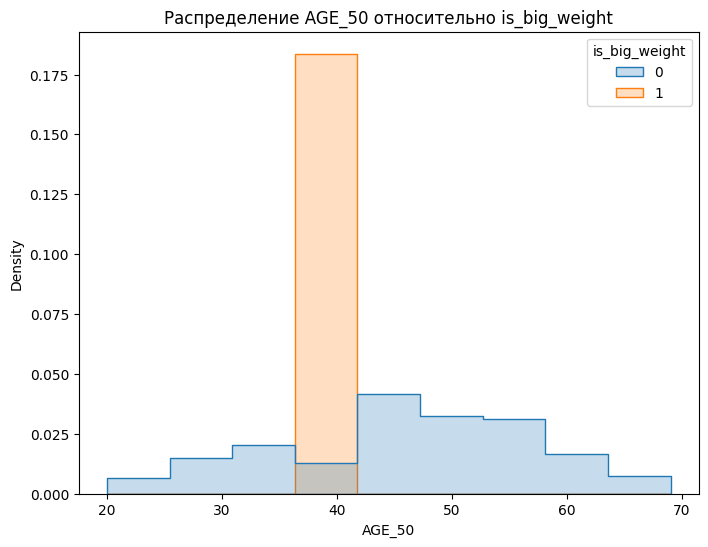

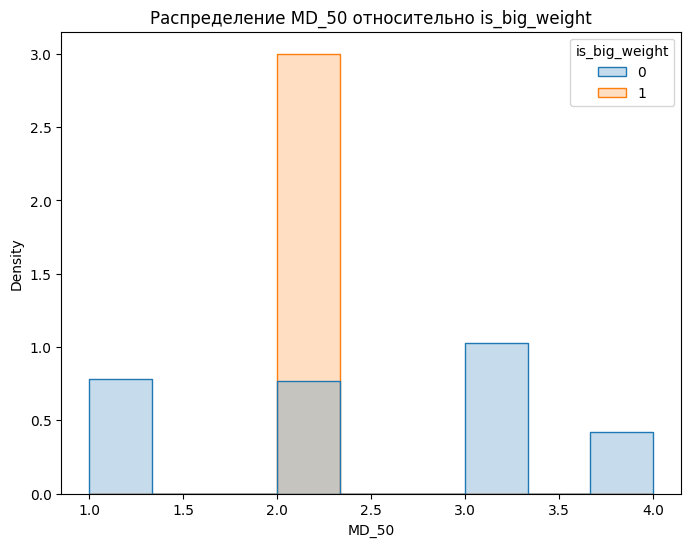

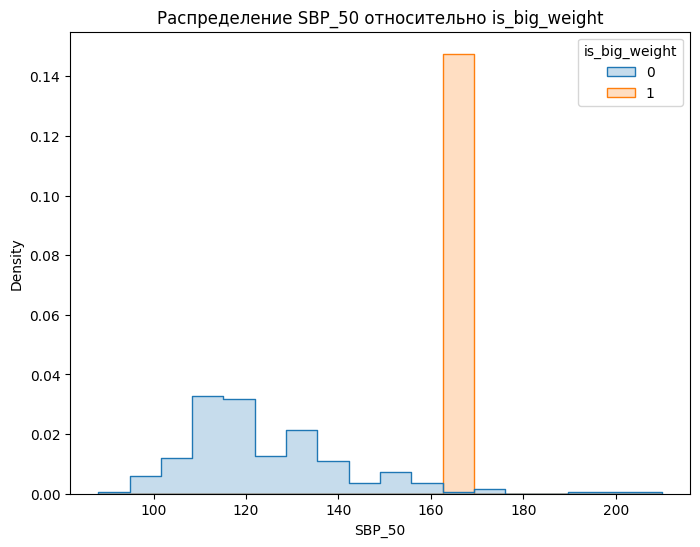

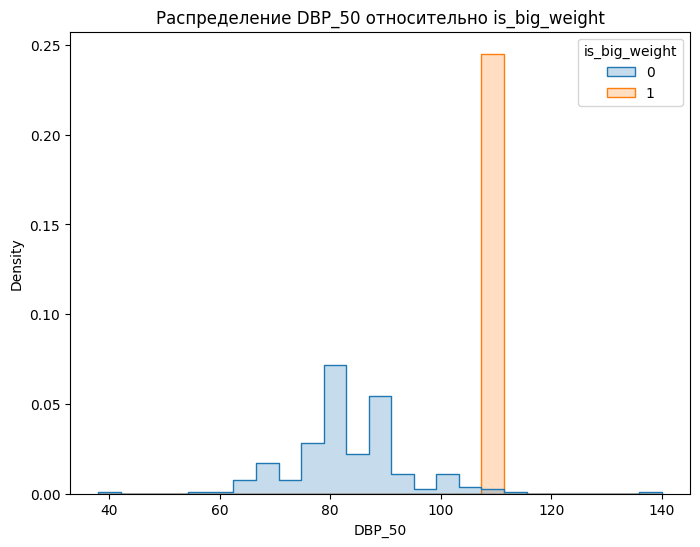

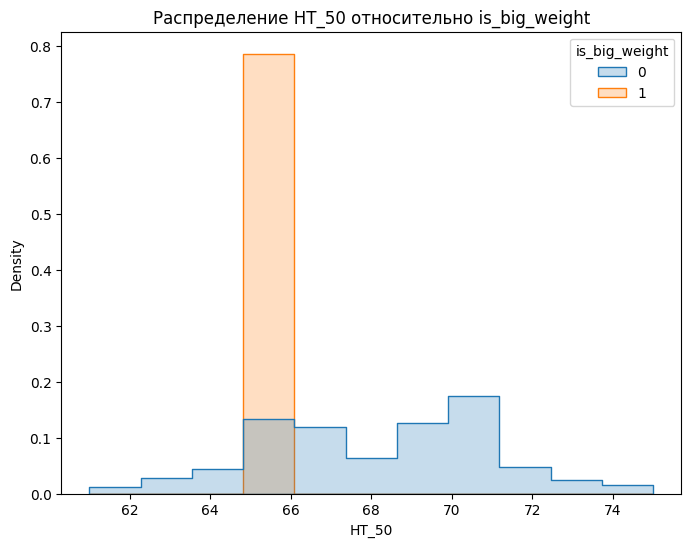

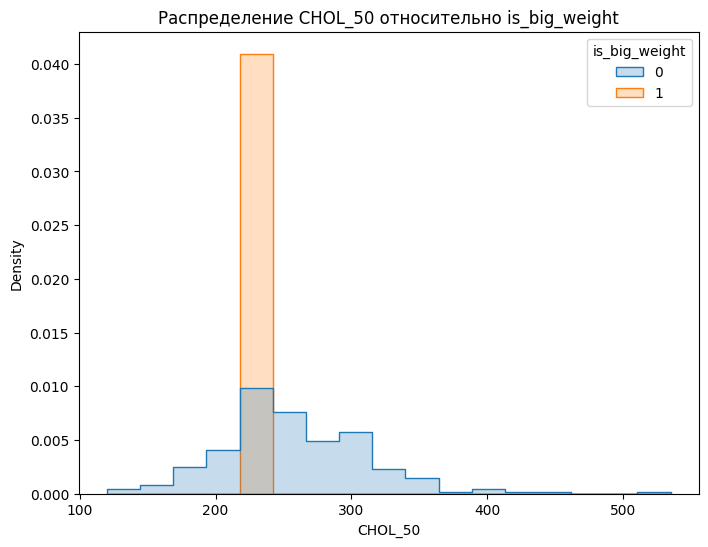

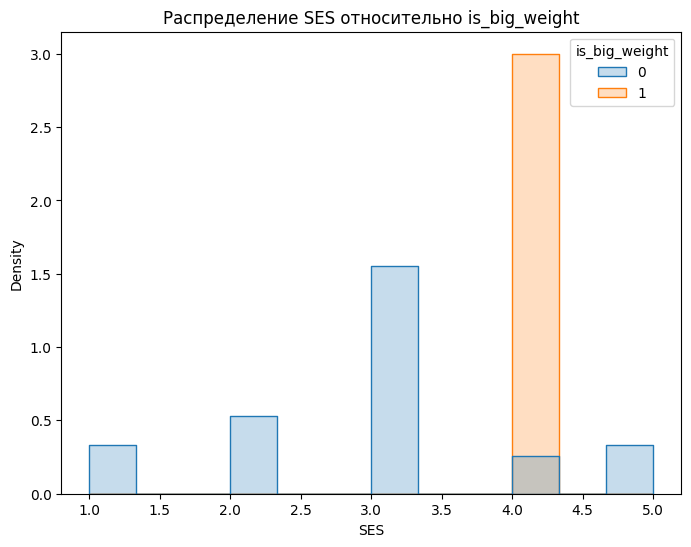

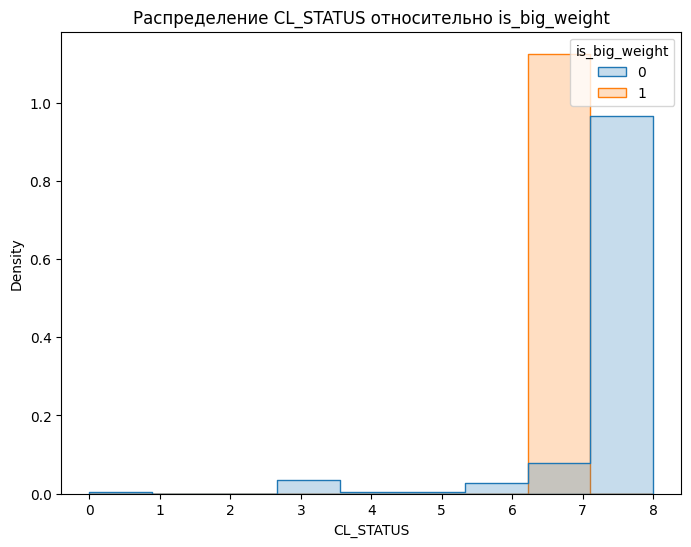

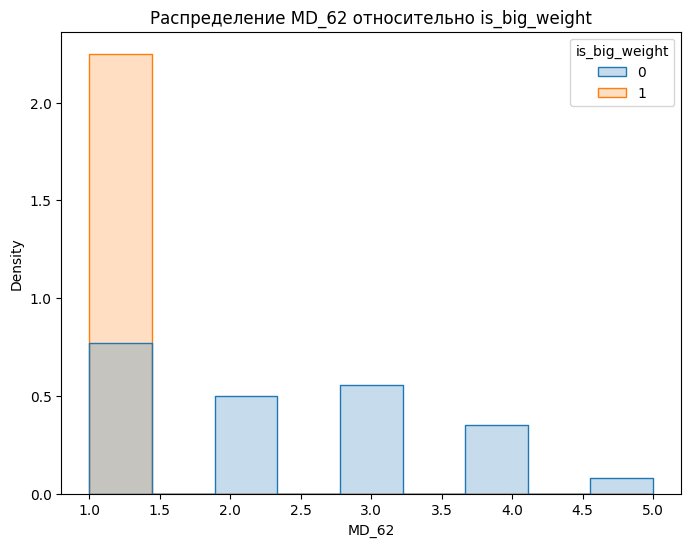

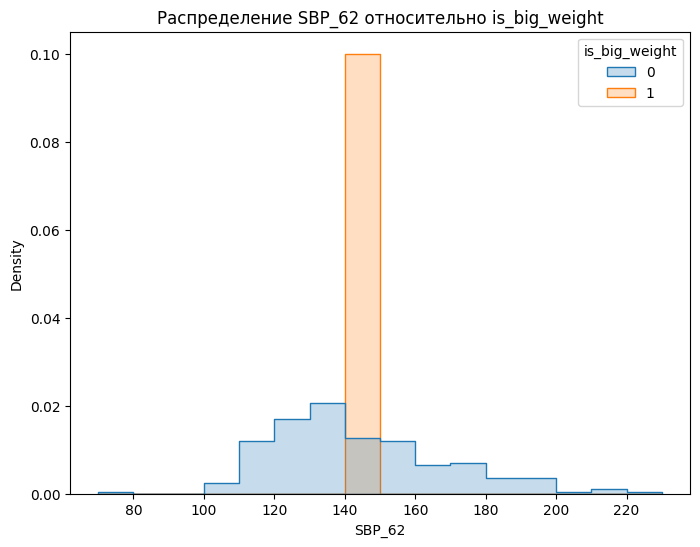

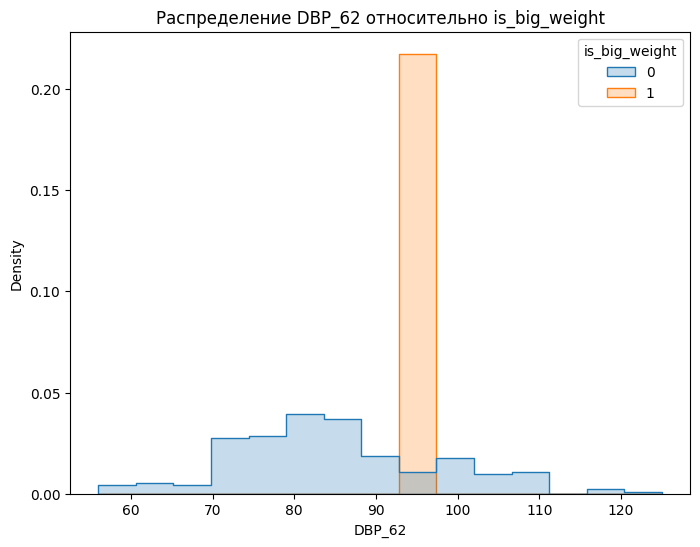

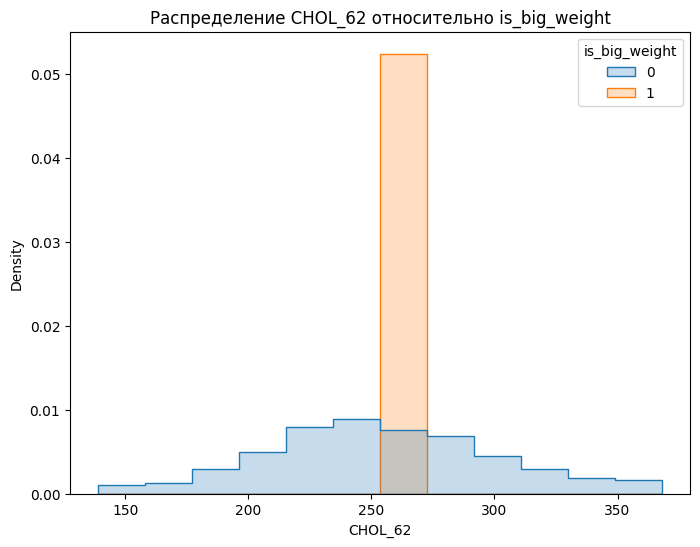

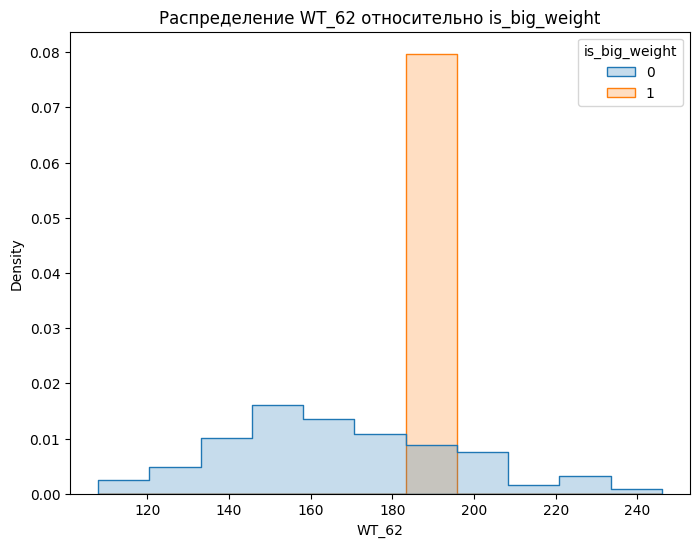

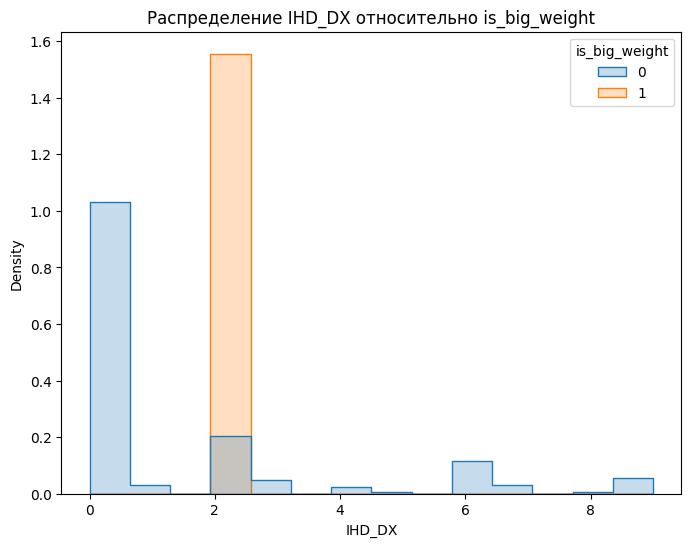

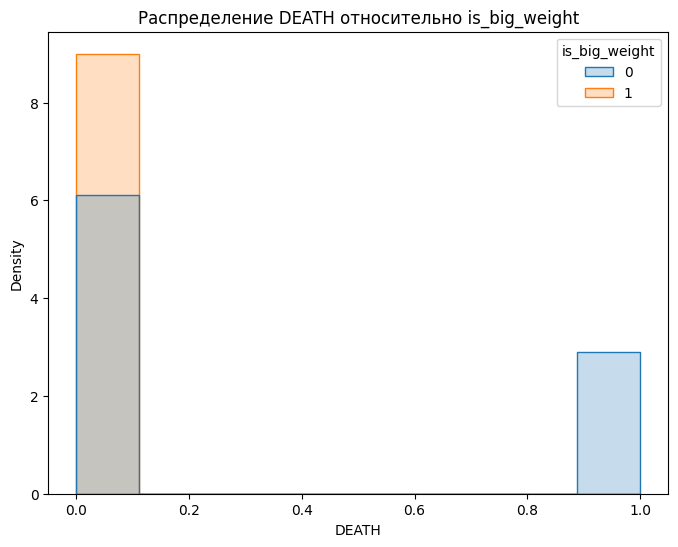

In [32]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_big_weight', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_big_weight')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [33]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_big_weight')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_big_weight')[df.select_dtypes(include=['object']).columns].describe()

ValueError: Cannot describe a DataFrame without columns

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [34]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_big_weight')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для AGE_50:

               count       mean        std   min   25%   50%   75%   max
is_big_weight                                                           
0              199.0  46.100503  10.828318  20.0  38.0  47.0  54.0  69.0
1                1.0  39.000000        NaN  39.0  39.0  39.0  39.0  39.0


Описательная статистика для MD_50:

               count      mean       std  min  25%  50%  75%  max
is_big_weight                                                    
0              199.0  2.361809  1.019878  1.0  1.0  2.0  3.0  4.0
1                1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0


Описательная статистика для SBP_50:

               count        mean        std    min    25%    50%    75%    max
is_big_weight                                                                 
0              199.0  124.502513  17.943197   88.0  110.0  120.0  130.0  210.0
1                1.0  164.000000        NaN  164.0  164.0  164.0  164.0  164.0


Описательная

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


type                    
             count unique    top  freq
is_best_wine                          
0             5220      2  white  3838
1             1277      2  white  1060

#### 1. **Fixed Acidity**:
   - **Среднее значение фиксированной кислотности** у вина с качеством ниже 7 (is_best_wine = 0) составляет 7.25, что чуть выше, чем у вин с качеством 7 и выше (is_best_wine = 1), где среднее значение равно 7.09.
   - **Разброс (std)** в обеих группах примерно одинаковый (~1.28 и 1.34), что говорит о схожей вариативности кислотности среди разных вин.
   - В обоих случаях минимальное значение около 3.8, максимальные значения около 15.9 и 15.6, что указывает на схожие диапазоны фиксированной кислотности между категориями.

#### 2. **Volatile Acidity**:
   - У лучших вин (**is_best_wine = 1**) средняя летучая кислотность ниже (0.289) по сравнению с менее качественными винами (**is_best_wine = 0**), где она составляет 0.352. Это может свидетельствовать о том, что летучая кислотность сильнее снижает качество вина.
   - **Стандартное отклонение** меньше у лучших вин, что говорит о более однородных показателях летучей кислотности среди качественных вин.

#### 3. **Citric Acid**:
   - У лучших вин среднее содержание лимонной кислоты чуть выше (0.335 против 0.315).
   - У обоих классов наблюдается низкая вариативность содержания лимонной кислоты, и медианные значения довольно близки.

#### 4. **Residual Sugar**:
   - В среднем, **остаточный сахар** у менее качественных вин выше (5.59) по сравнению с лучшими винами (4.83). Это может указывать на тенденцию того, что менее сладкие вина имеют более высокую оценку.
   - У обоих типов вина наблюдаются существенные выбросы в максимальных значениях остаточного сахара.

#### 5. **Chlorides**:
   - Лучшие вина имеют **меньшее среднее содержание хлоридов** (0.0445 против 0.0588), что может указывать на отрицательное влияние хлоридов на качество вина.
   - Также наблюдается меньшее **стандартное отклонение** среди лучших вин, что указывает на более однородный состав по хлоридам.

#### 6. **Free Sulfur Dioxide**:
   - Среднее содержание свободного диоксида серы не сильно отличается между группами (30.4 и 31.0), что свидетельствует о том, что этот показатель слабо коррелирует с качеством вина.
   - У менее качественных вин наблюдается более высокий разброс значений.

#### 7. **Total Sulfur Dioxide**:
   - Лучшие вина содержат меньше **общего диоксида серы** (109.89 против 117.18), что может указывать на негативное влияние высокого содержания серы на восприятие вина.
   - У менее качественных вин также выше **максимальные значения** общего содержания диоксида серы.

#### 8. **Density**:
   - Лучшие вина имеют **меньшую плотность** в среднем (0.993 против 0.995), что может свидетельствовать о лучшем качестве.
   - Стандартное отклонение плотности невелико, а диапазон значений у обоих классов вин узкий, что указывает на стабильность этого показателя.

#### 9. **pH**:
   - Значения pH почти идентичны в обеих группах (3.216 против 3.227), что указывает на отсутствие сильного влияния уровня pH на качество вина.

#### 10. **Sulphates**:
   - Лучшие вина имеют **чуть более высокое среднее содержание сульфатов** (0.541 против 0.528). Однако разница невелика, что может указывать на слабую зависимость между содержанием сульфатов и качеством.
   - Разброс значений также схожий, что говорит о стабильности этого показателя для обеих категорий.

#### 11. **Alcohol**:
   - Значительное различие в содержании алкоголя: лучшие вина имеют более высокое **среднее содержание алкоголя** (11.43 против 10.26). Это указывает на тенденцию, что вина с более высоким содержанием алкоголя чаще оцениваются выше.
   - В то же время у лучших вин наблюдается чуть больший разброс по содержанию алкоголя.

#### 12. **Quality**:
   - Как и ожидалось, вина с **is_best_wine = 1** имеют среднее значение качества около 7, в то время как вина с **is_best_wine = 0** — 5.49.
   - Важно отметить, что у лучших вин разброс по качеству ниже, что указывает на более стабильное восприятие.

### Вывод:
На основе представленных данных можно сделать выводы о ключевых характеристиках, которые влияют на качество вина. В частности:
- Более качественные вина имеют **меньшее содержание летучих кислот**, хлоридов и общего диоксида серы.
- Лучшие вина содержат **больше алкоголя**, что, возможно, положительно сказывается на восприятии.
- Несмотря на различия, такие параметры, как pH, сульфаты и свободный диоксид серы, имеют незначительное влияние на итоговое качество.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_best_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.033971


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['type']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False,True,False,False,False,False,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,False,True,False,False,False,False,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,False,True,False,False,False,False,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,False,False,True,False,False,False,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,False,False,True,False,False,False,True
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,False,True,False,False,False,False,True
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,False,False,True,False,False,False,True
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,False,False,False,True,False,False,True


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,False
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,False
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,False
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,False
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,True
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,True
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,True
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8187
Точность на тестовой выборке: 0.8254

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1044
           1       0.67      0.22      0.33       256

    accuracy                           0.83      1300
   macro avg       0.76      0.60      0.61      1300
weighted avg       0.80      0.83      0.79      1300



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                 Feature  Coefficient
10               alcohol     5.683547
1       volatile acidity    -4.316148
3         residual sugar     2.822608
9              sulphates     2.459910
5    free sulfur dioxide     2.160035
4              chlorides    -2.092775
6   total sulfur dioxide    -1.321306
0          fixed acidity     1.138116
8                     pH     0.896175
7                density    -0.784141
11            type_white     0.286346
2            citric acid     0.142521


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8088
Отклонение точности: 0.0135


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

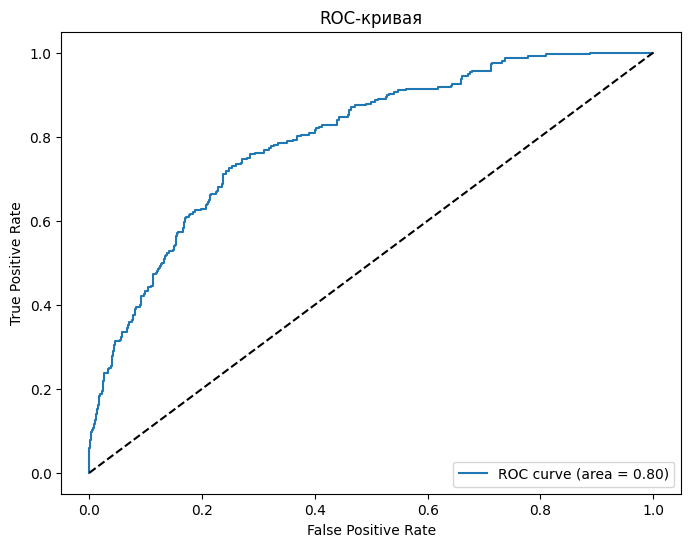

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---